In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import itertools as it
import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [2]:
# For autotesting
%load_ext autoreload
%autoreload 2

In [3]:
width = 9.5
height = 9.5
plt.rcParams['figure.figsize'] = [width, height]

In [4]:
def generate_gaussians(gaussians):
    return [helper.get_gaussian(*gaussian)[2] for gaussian in gaussians]

In [5]:
size = 200

In [6]:
method = "normal"

In [7]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 25,25
gaussian_static = [x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size]

In [8]:
colorschemes = color_schemes.get_colorbrewer_schemes()

In [9]:
color_codes = [color_schemes.get_main_color(i)[-4] for i in colorschemes]

In [10]:
images_overlapping = []
z_sums = []
gaussians = []
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    if i == 1:
        static_gaussian_rep[0][5] = 1 
        static_gaussian_rep[0][7] = 1
    else:
        static_gaussian_rep[0][5] = i * 3 
        static_gaussian_rep[0][7] = i * 3
    static_gaussian_rep[1][4] = +2.5
    static_gaussian_rep[1][6] = +2.5
    static_gaussian_rep[2][4] = -2.5
    static_gaussian_rep[2][6] = -2.5
    static_gaussian_rep[3][4] = +2.5
    static_gaussian_rep[3][6] = -2.5
    static_gaussian_rep[4][4] = -2.5
    static_gaussian_rep[4][6] = +2.5
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([i.copy() for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, 0, 1, 0, 1, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, 2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, 2.5, 25, 200]]
[[-10, 10, -10, 10, 0, 6, 0, 6, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, 2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, 2.5, 25, 200]]
[[-10, 10, -10, 10, 0, 9, 0, 9, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, 2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, 2.5, 25, 200]]
[[-10, 10, -10, 10, 0, 12, 0, 12, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, 2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, 2.5, 25, 200]]
[[-10, 10, -10, 10, 0, 15, 0, 15, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10,

In [11]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    v = i*2
    static_gaussian_rep[1][4] = +v
    static_gaussian_rep[1][6] = +v
    static_gaussian_rep[2][4] = -v
    static_gaussian_rep[2][6] = -v
    static_gaussian_rep[3][4] = +v
    static_gaussian_rep[3][6] = -v
    static_gaussian_rep[4][4] = -v
    static_gaussian_rep[4][6] = +v
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[1:5], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([i.copy() for i in static_gaussian_rep[1:5]])

[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 2, 25, 2, 25, 200], [-10, 10, -10, 10, -2, 25, -2, 25, 200], [-10, 10, -10, 10, 2, 25, -2, 25, 200], [-10, 10, -10, 10, -2, 25, 2, 25, 200]]
[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 4, 25, 4, 25, 200], [-10, 10, -10, 10, -4, 25, -4, 25, 200], [-10, 10, -10, 10, 4, 25, -4, 25, 200], [-10, 10, -10, 10, -4, 25, 4, 25, 200]]
[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 6, 25, 6, 25, 200], [-10, 10, -10, 10, -6, 25, -6, 25, 200], [-10, 10, -10, 10, 6, 25, -6, 25, 200], [-10, 10, -10, 10, -6, 25, 6, 25, 200]]
[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 8, 25, 8, 25, 200], [-10, 10, -10, 10, -8, 25, -8, 25, 200], [-10, 10, -10, 10, 8, 25, -8, 25, 200], [-10, 10, -10, 10, -8, 25, 8, 25, 200]]
[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 10, 25, 10, 25, 200], [-10, 10, -10, 10, -10, 25, -10, 25, 200], [-10, 10, -10, 10, 10, 25, -10, 25, 200], [-10, 10, -10, 10, -10, 25, 10, 25

In [12]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5
gaussian_static = [x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size]

In [13]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    v = 0.5*i
    static_gaussian_rep[1][4] = -v
    static_gaussian_rep[1][6] = -v
    static_gaussian_rep[3][4] = -v
    static_gaussian_rep[3][6] = +v
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep, colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([i.copy() for i in static_gaussian_rep])

[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -0.5, 5, -0.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -0.5, 5, 0.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -1.0, 5, -1.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -1.0, 5, 1.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -1.5, 5, -1.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -1.5, 5, 1.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -2.0, 5, -2.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -2.0, 5, 2.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -2.5, 5, 2.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]


In [14]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    v = 0.5*i
    static_gaussian_rep[1][4] = -4
    static_gaussian_rep[2][4] = -v
    static_gaussian_rep[2][6] = -v
    static_gaussian_rep[3][4] = -v
    static_gaussian_rep[3][6] = +v
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:4], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([i.copy() for i in static_gaussian_rep[:4]])

[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -0.5, 5, -0.5, 5, 200], [-10, 10, -10, 10, -0.5, 5, 0.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -1.0, 5, -1.0, 5, 200], [-10, 10, -10, 10, -1.0, 5, 1.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -1.5, 5, -1.5, 5, 200], [-10, 10, -10, 10, -1.5, 5, 1.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -2.0, 5, -2.0, 5, 200], [-10, 10, -10, 10, -2.0, 5, 2.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, 2.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]


Wie verhalten sich die Contourlinien im Vergleich zu den Gaussians. Wie viele Gaussians sind zu erkennen obwohl es nur 4 gibt. Wie viele Gaussians fehlen/entstehen?

In [15]:
method = "equal_density"

In [16]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 25,25
gaussian_static = [x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size]

In [17]:
images_overlapping_equal = []
z_sums_equal = []
gaussians_equal = []
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    if i == 1:
        static_gaussian_rep[0][5] = 1 
        static_gaussian_rep[0][7] = 1
    else:
        static_gaussian_rep[0][5] = i * 3 
        static_gaussian_rep[0][7] = i * 3
    static_gaussian_rep[1][4] = +2.5
    static_gaussian_rep[1][6] = +2.5
    static_gaussian_rep[2][4] = -2.5
    static_gaussian_rep[2][6] = -2.5
    static_gaussian_rep[3][4] = +2.5
    static_gaussian_rep[3][6] = -2.5
    static_gaussian_rep[4][4] = -2.5
    static_gaussian_rep[4][6] = +2.5
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping_equal.append(image)
    z_sums_equal.append(z_sum)
    gaussians_equal.append([i.copy() for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, 0, 1, 0, 1, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, 2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, 2.5, 25, 200]]
[[-10, 10, -10, 10, 0, 6, 0, 6, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, 2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, 2.5, 25, 200]]
[[-10, 10, -10, 10, 0, 9, 0, 9, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, 2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, 2.5, 25, 200]]
[[-10, 10, -10, 10, 0, 12, 0, 12, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, 2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, 2.5, 25, 200]]
[[-10, 10, -10, 10, 0, 15, 0, 15, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10,

In [18]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    v = i*2
    static_gaussian_rep[1][4] = +v
    static_gaussian_rep[1][6] = +v
    static_gaussian_rep[2][4] = -v
    static_gaussian_rep[2][6] = -v
    static_gaussian_rep[3][4] = +v
    static_gaussian_rep[3][6] = -v
    static_gaussian_rep[4][4] = -v
    static_gaussian_rep[4][6] = +v
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[1:5], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping_equal.append(image)
    z_sums_equal.append(z_sum)
    gaussians_equal.append([i.copy() for i in static_gaussian_rep[1:5]])

[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 2, 25, 2, 25, 200], [-10, 10, -10, 10, -2, 25, -2, 25, 200], [-10, 10, -10, 10, 2, 25, -2, 25, 200], [-10, 10, -10, 10, -2, 25, 2, 25, 200]]
[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 4, 25, 4, 25, 200], [-10, 10, -10, 10, -4, 25, -4, 25, 200], [-10, 10, -10, 10, 4, 25, -4, 25, 200], [-10, 10, -10, 10, -4, 25, 4, 25, 200]]
[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 6, 25, 6, 25, 200], [-10, 10, -10, 10, -6, 25, -6, 25, 200], [-10, 10, -10, 10, 6, 25, -6, 25, 200], [-10, 10, -10, 10, -6, 25, 6, 25, 200]]
[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 8, 25, 8, 25, 200], [-10, 10, -10, 10, -8, 25, -8, 25, 200], [-10, 10, -10, 10, 8, 25, -8, 25, 200], [-10, 10, -10, 10, -8, 25, 8, 25, 200]]
[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 10, 25, 10, 25, 200], [-10, 10, -10, 10, -10, 25, -10, 25, 200], [-10, 10, -10, 10, 10, 25, -10, 25, 200], [-10, 10, -10, 10, -10, 25, 10, 25

In [19]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5
gaussian_static = [x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size]

In [20]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    v = 0.5*i
    static_gaussian_rep[1][4] = -v
    static_gaussian_rep[1][6] = -v
    static_gaussian_rep[3][4] = -v
    static_gaussian_rep[3][6] = +v
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep, colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping_equal.append(image)
    z_sums_equal.append(z_sum)
    gaussians_equal.append([i.copy() for i in static_gaussian_rep])

[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -0.5, 5, -0.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -0.5, 5, 0.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -1.0, 5, -1.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -1.0, 5, 1.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -1.5, 5, -1.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -1.5, 5, 1.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -2.0, 5, -2.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -2.0, 5, 2.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -2.5, 5, 2.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]


In [21]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    v = 0.5*i
    static_gaussian_rep[1][4] = -4
    static_gaussian_rep[2][4] = -v
    static_gaussian_rep[2][6] = -v
    static_gaussian_rep[3][4] = -v
    static_gaussian_rep[3][6] = +v
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:4], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping_equal.append(image)
    z_sums_equal.append(z_sum)
    gaussians_equal.append([i.copy() for i in static_gaussian_rep[:4]])

[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -0.5, 5, -0.5, 5, 200], [-10, 10, -10, 10, -0.5, 5, 0.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -1.0, 5, -1.0, 5, 200], [-10, 10, -10, 10, -1.0, 5, 1.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -1.5, 5, -1.5, 5, 200], [-10, 10, -10, 10, -1.5, 5, 1.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -2.0, 5, -2.0, 5, 200], [-10, 10, -10, 10, -2.0, 5, 2.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, 2.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]


['mu_x', 'variance_x', 'mu_y', 'variance_y']


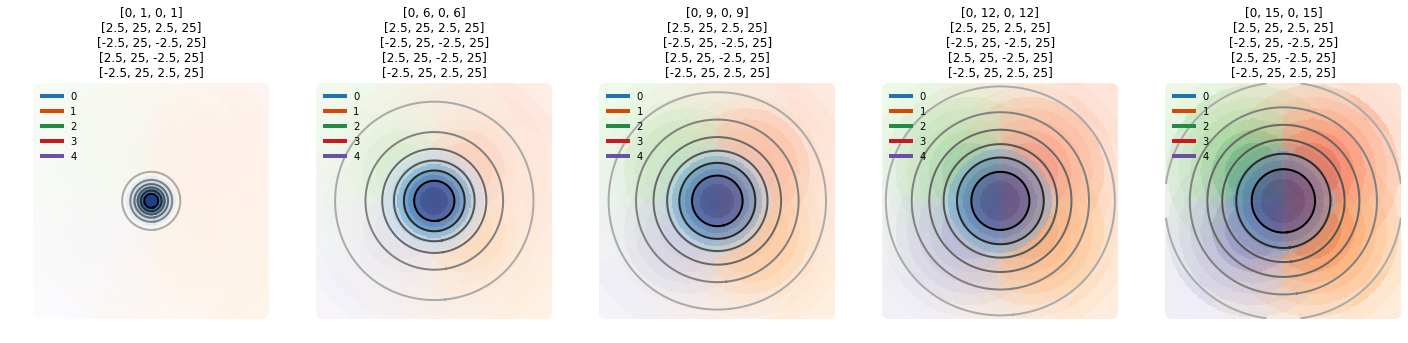

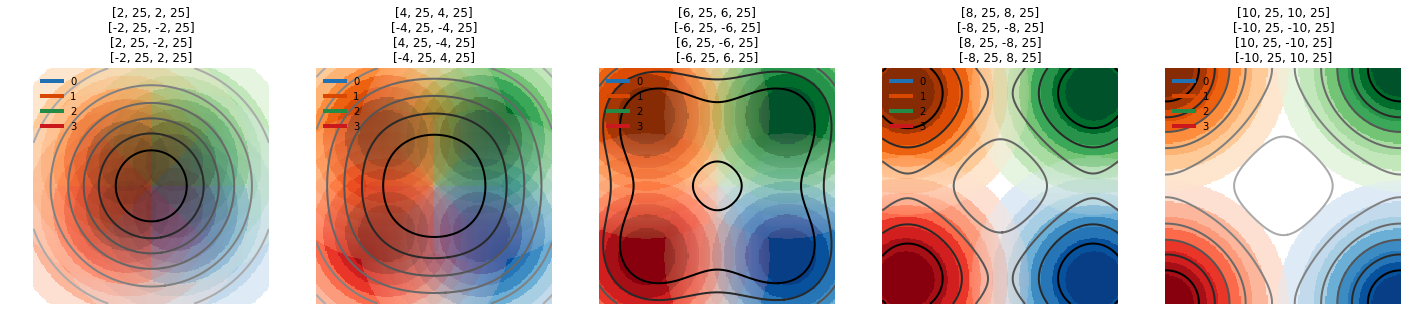

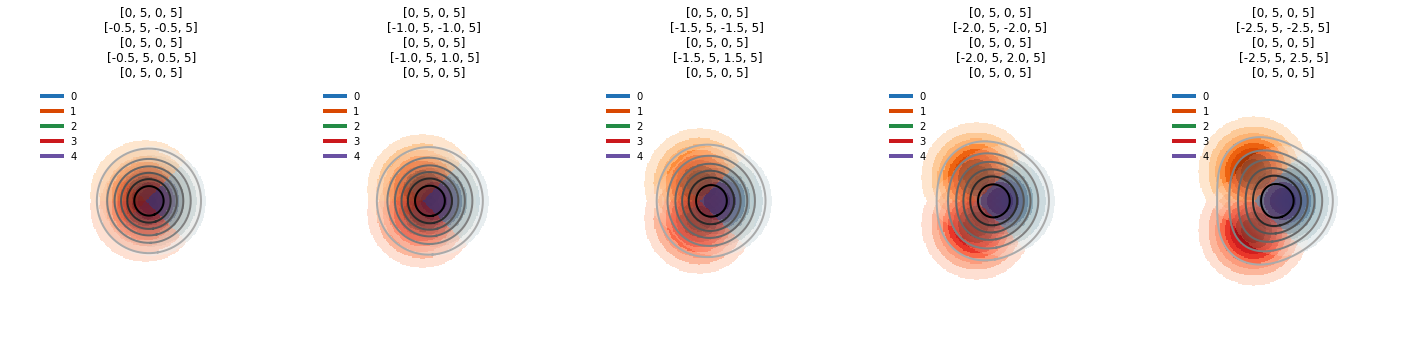

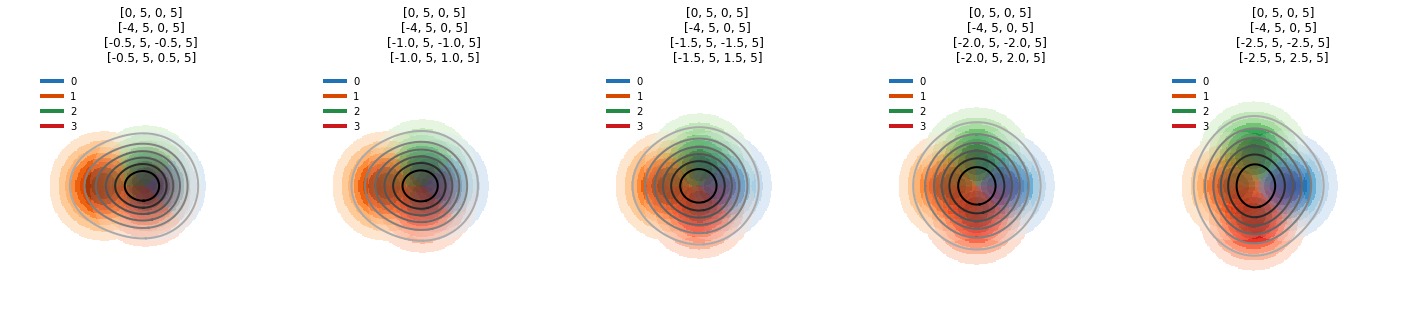

In [22]:
picture_worker.plot_images(images_overlapping, gaussians, z_sums, color_codes, contour_lines_method="equal_value", num_of_levels=5)

['mu_x', 'variance_x', 'mu_y', 'variance_y']


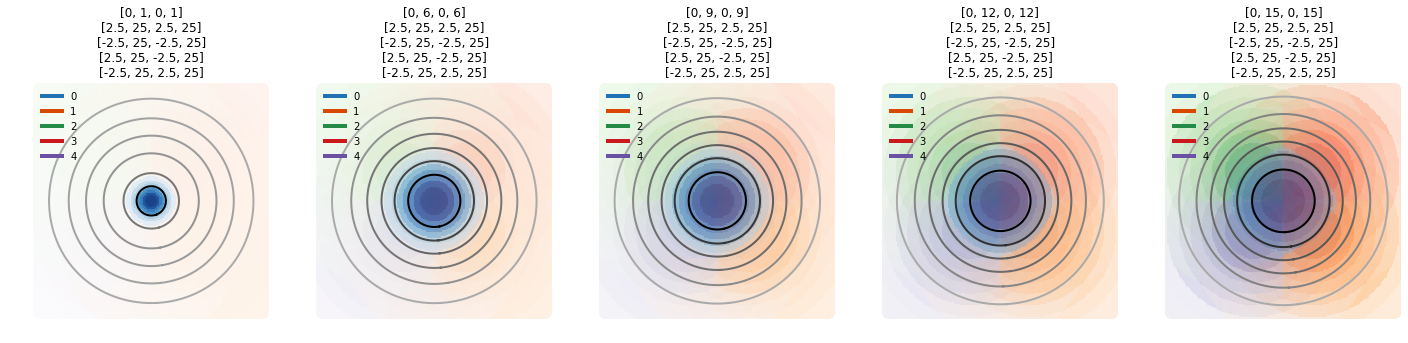

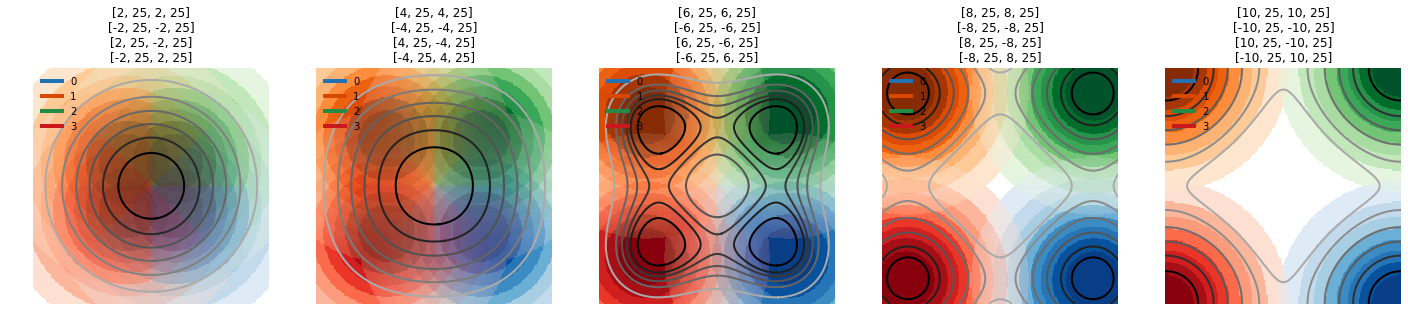

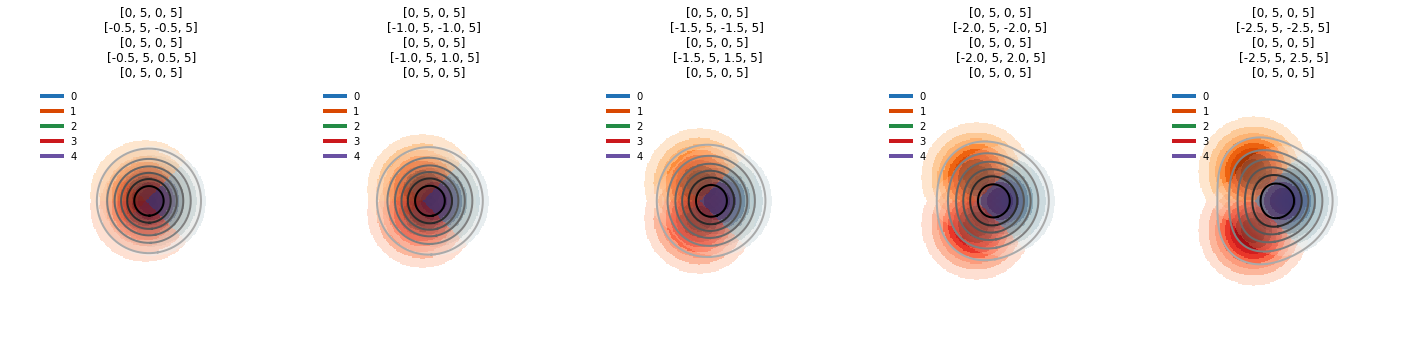

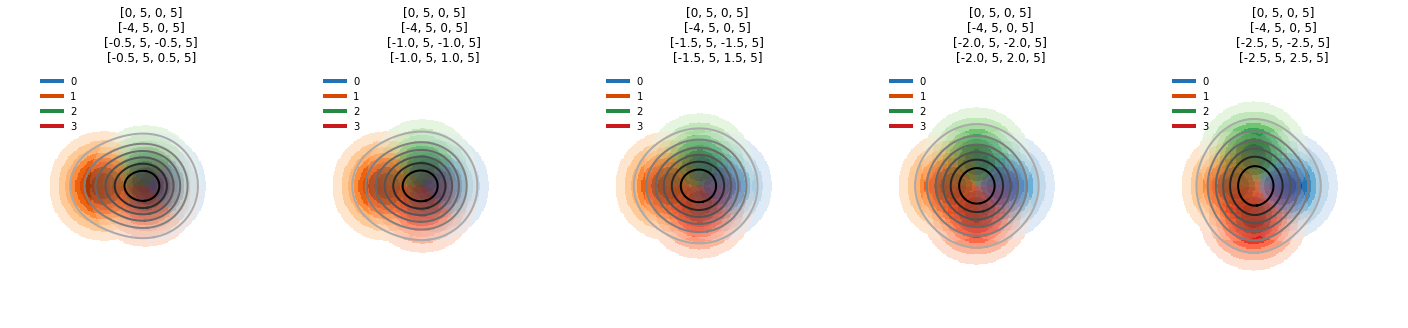

In [23]:
picture_worker.plot_images(images_overlapping, gaussians, z_sums, color_codes, contour_lines_method="equal_density", num_of_levels=5)

['mu_x', 'variance_x', 'mu_y', 'variance_y']


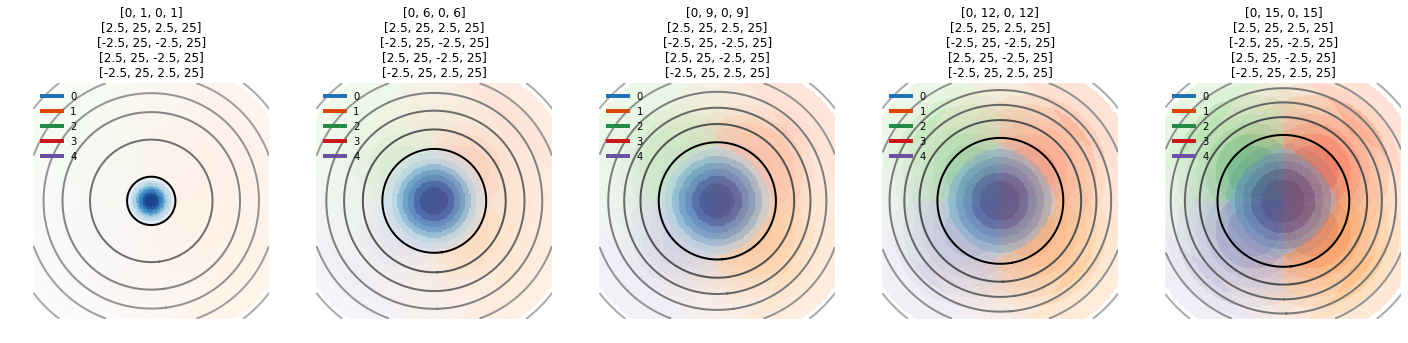

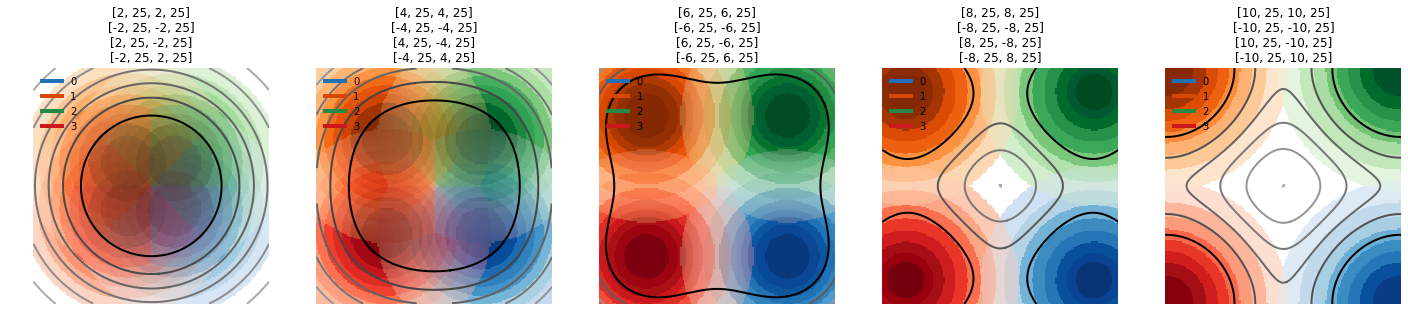

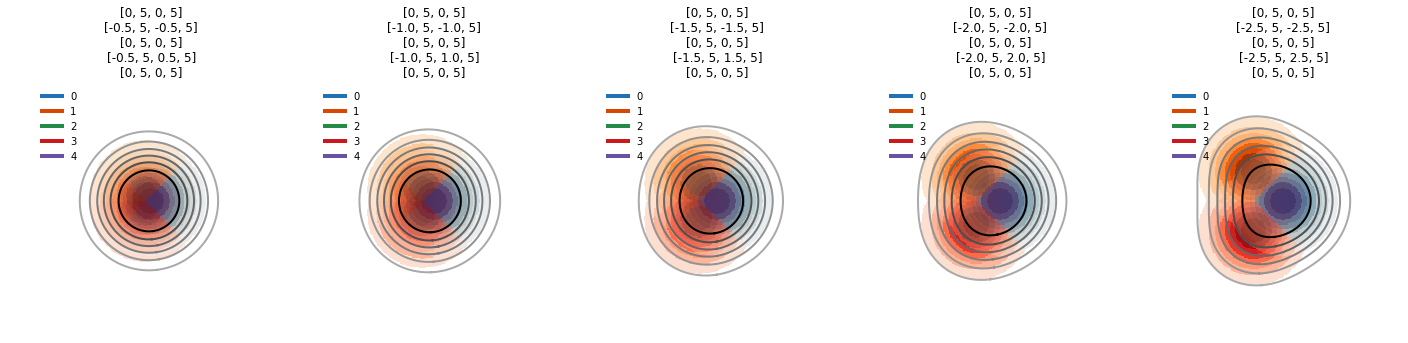

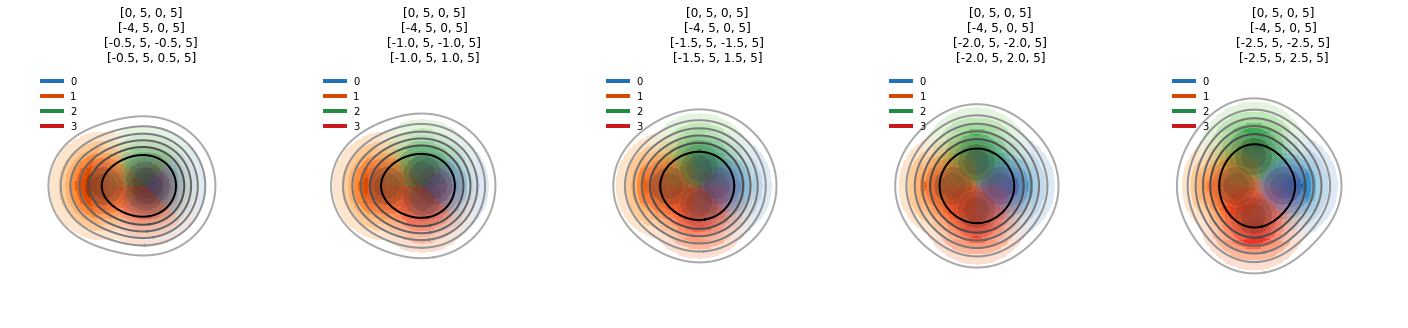

In [24]:
picture_worker.plot_images(images_overlapping_equal, gaussians_equal, z_sums_equal, color_codes, contour_lines_method="equal_horizontal", num_of_levels=5)

['mu_x', 'variance_x', 'mu_y', 'variance_y']


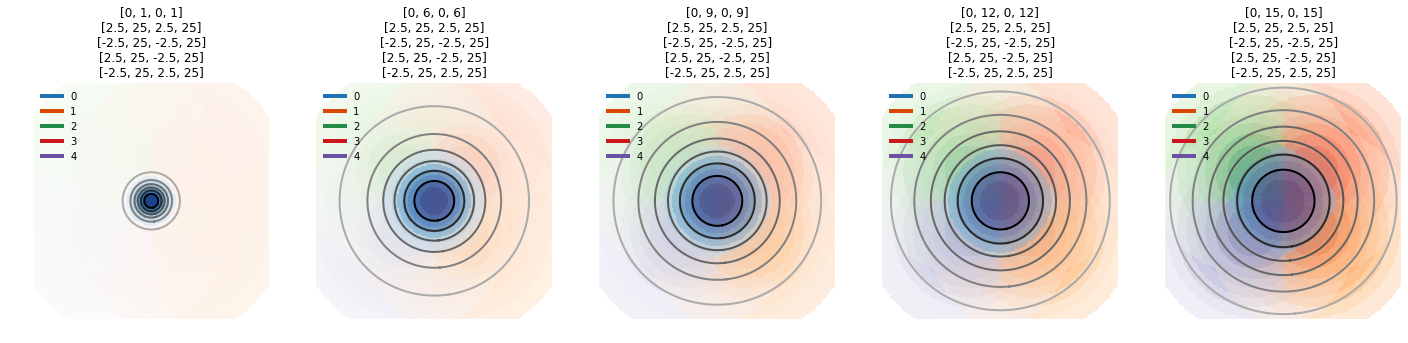

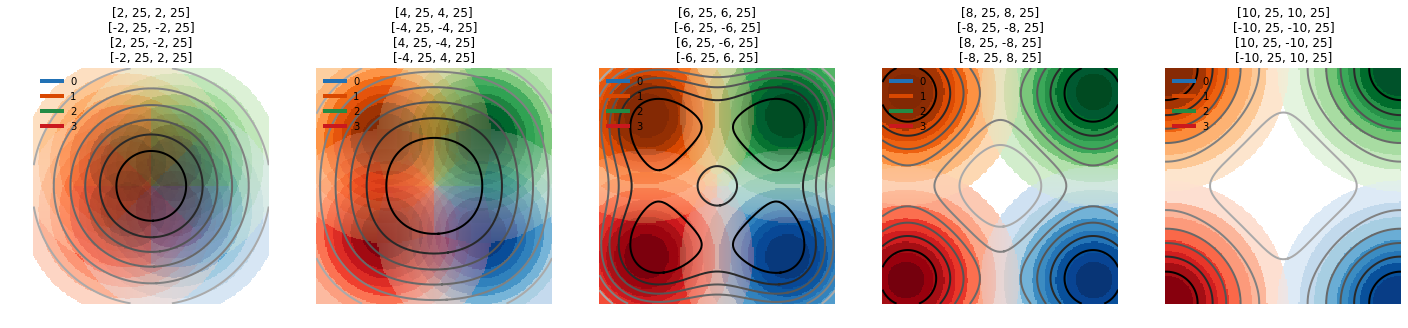

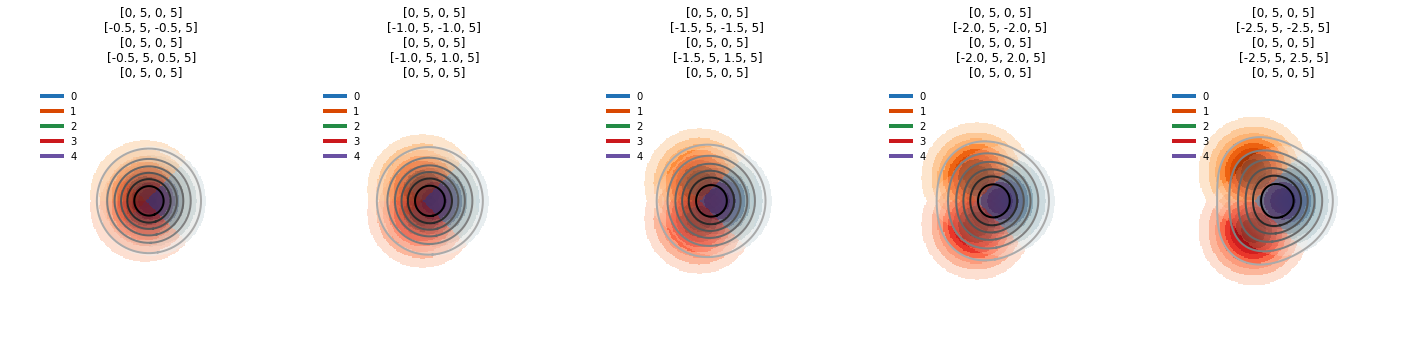

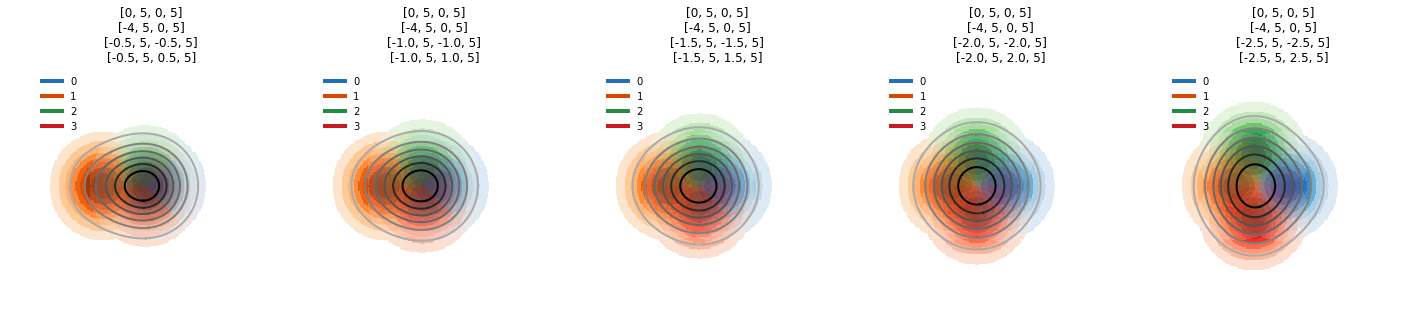

In [25]:
picture_worker.plot_images(images_overlapping_equal, gaussians_equal, z_sums_equal, color_codes, contour_lines_method="normal", num_of_levels=5)